In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
file = pd.read_csv('Downloads\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

In [96]:
df = df[df['Country Code'] == 1]  # considering only INDIAN Restraunts 

In [97]:
df.reset_index(drop = True, inplace = True) # reseting the index

In [66]:
# summarising given cities as Delhi-NCR and other as Rest of India
df['City'].replace('New Delhi', 'Delhi-NCR', inplace = True)
df['City'].replace('Ghaziabad', 'Delhi-NCR', inplace = True)
df['City'].replace('Noida', 'Delhi-NCR', inplace = True)
df['City'].replace('Gurgaon', 'Delhi-NCR', inplace = True)
df['City'].replace('Faridabad', 'Delhi-NCR', inplace = True)

In [67]:
# all other cities as Rest of India
indexes = df[df['City'] != 'Delhi-NCR'].index

df.loc[indexes, 'City'] = 'Rest of India'

# 1.1

In [116]:
count = df['City'].value_counts()

In [117]:
count

Delhi-NCR        7947
Rest of India     705
Name: City, dtype: int64

In [118]:
x = count.index
y = count.values


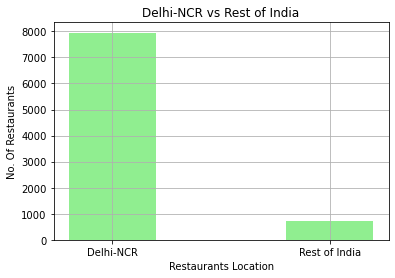

In [119]:
plt.bar(x,y, width = 0.4, color = 'lightgreen')
plt.grid()
plt.title('Delhi-NCR vs Rest of India')
plt.xlabel("Restaurants Location")
plt.ylabel("No. Of Restaurants")
plt.show()

# 1.2

In [120]:
# creating 2 sets of cuisines according to the city.
NCR_cuisines = set()
Rest_cuisines = set()
df['Cuisines'] = df['Cuisines'].str.split(', ') 

In [121]:
NCR = df[df['City'] == 'Delhi-NCR']
Rest = df[df['City'] == 'Rest of India']

In [122]:
for i in NCR.index : 
    for j in NCR.loc[i,'Cuisines']:
        NCR_cuisines.add(j)

In [123]:
for i in Rest.index : 
    for j in Rest.loc[i, 'Cuisines']:
        Rest_cuisines.add(j)

In [124]:
unique_cuisines = Rest_cuisines - NCR_cuisines


In [125]:
for k in unique_cuisines:
    print(k)

Malwani
BBQ
German
Cajun


In [126]:
#API CALL
import requests

In [127]:
header = {"Accept":"application/json","user-key":"0ab9b3ea3b2aa96bf4b2843fb711a48f", 'User-agent' : 'curl/7/43.0'}
parameter = {'query' : 'Delhi NCR'}

In [130]:
a = requests.get('https://developers.zomato.com/api/v2.1/locations', headers = header,params = parameter)
data = a.json()
data

{'location_suggestions': [{'entity_type': 'city',
   'entity_id': 1,
   'title': 'Delhi NCR',
   'latitude': 28.625789,
   'longitude': 77.210276,
   'city_id': 1,
   'city_name': 'Delhi NCR',
   'country_id': 1,
   'country_name': 'India'}],
 'status': 'success',
 'has_more': 0,
 'has_total': 0,
 'user_has_addresses': True}

In [132]:
# fetching all cuisines in Delhi NCR

b = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers = header,params = {'city_id' : 1})
data1 = b.json()

In [134]:
for i in data1['cuisines']:
    if i['cuisine']['cuisine_name'] in unique_cuisines:
        print(i['cuisine']['cuisine_name'])

BBQ


# 1.3

In [136]:
ncr = {}
rest = {}

In [137]:
for i in NCR.index : 
    for j in NCR.loc[i,'Cuisines']:
        ncr[j] = ncr.get(j, 0) + 1
        
for i in Rest.index : 
    for j in Rest.loc[i, 'Cuisines']:
        rest[j] = rest.get(j, 0) + 1

In [138]:
# sorting the list of cuisines according to their number of counts and fetching top 10 cuisines.
sorted_ncr = sorted(ncr.items(), key = lambda kv:kv[1], reverse = True)[:10]
sorted_rest = sorted(rest.items(), key = lambda kv:kv[1], reverse = True)[:10]

In [140]:
print('Top 10 cuisines served by maximum number of restaurants in Delhi NCR - ')
print()
for i in sorted_ncr:
    print(i[0],i[1])
    
print('Top 10 cuisines served by maximum number of restaurants in Rest of India -')
for j in sorted_rest:
    print(j[0],j[1])

Top 10 cuisines served by maximum number of restaurants in Delhi NCR - 

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
Top 10 cuisines served by maximum number of restaurants in Rest of India -
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


# 1.4

In [141]:
Delhi_cuisines_names = []
Delhi_cuisines_counts = []
rest_cuisine_name = []
rest_cuisine_count = []


In [142]:
for i in range(10):
    Delhi_cuisines_names.append(sorted_ncr[i][0])
    Delhi_cuisines_counts.append(sorted_ncr[i][1])
    rest_cuisine_name.append(sorted_rest[i][0])
    rest_cuisine_count.append(sorted_rest[i][1])


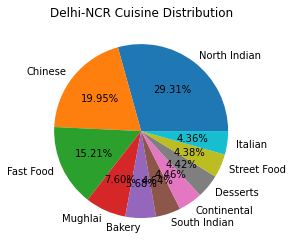

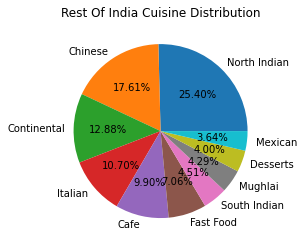

In [143]:
plt.pie(Delhi_cuisines_counts, labels = Delhi_cuisines_names, autopct = '%.2f%%')
plt.title('Delhi-NCR Cuisine Distribution')
plt.show()

plt.pie(rest_cuisine_count, labels = rest_cuisine_name, autopct = '%.2f%%')
plt.title('Rest Of India Cuisine Distribution')
plt.show()

# 2

# 2.1

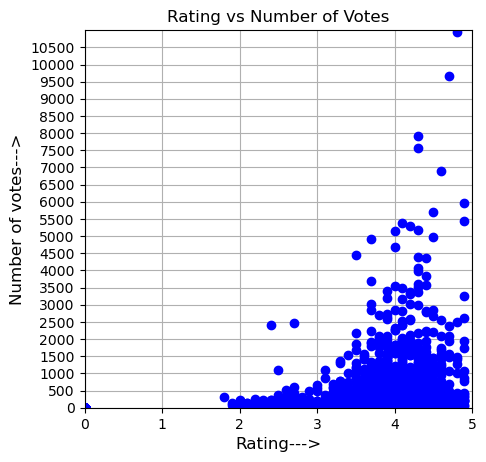

In [54]:
plt.figure(num=None, figsize=(5,5), dpi=100, facecolor='w', edgecolor='green')
plt.plot(df['Aggregate rating'], df['Votes'],'bo')
plt.yticks(np.arange(0, 11000, 500))
plt.axis([0, 5, 0, 11000])
plt.xlabel('Rating--->', size=12)
plt.ylabel('Number of votes--->', size=12)
plt.title('Rating vs Number of Votes')
plt.grid()
plt.show()

# 2.2


In [75]:
# splitting Cuisines of each restaurant to have them in a list.
df['Cuisines'] = df['Cuisines'].str.split(pat = ', ')

In [76]:
for i in df.index:
    df.loc[i,'Number of cuisines'] = len(df.loc[i,'Cuisines'])

In [33]:
# sorting values according to the Aggregate Rating.
x = df.sort_values(by = 'Aggregate rating')['Aggregate rating']

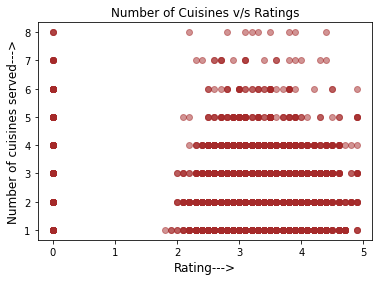

In [34]:
plt.scatter(x, df['Number of cuisines'], c = 'brown', alpha = 0.5)
plt.title('Number of Cuisines v/s Ratings')
plt.xlabel('Rating--->', size=12)
plt.ylabel('Number of cuisines served--->', size=12)
plt.show()

# 2.3

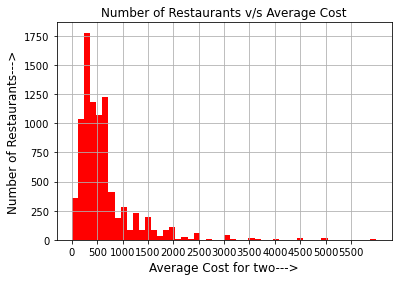

In [43]:

plt.hist(df['Average Cost for two'],range=[0,6000], facecolor='red', align='mid',bins=50)
plt.xticks(np.arange(0, 6000, 500))
plt.grid()
plt.title('Number of Restaurants v/s Average Cost')
plt.xlabel('Average Cost for two--->', size=12)
plt.ylabel('Number of Restaurants--->', size=12)
plt.show()

# 2.4

In [99]:
rating=df['Aggregate rating']
cuisine=df['Number of cuisines']

In [115]:
unique=cuisine<=2

In [116]:
sp=cuisine[unique]
spr=rating[unique]

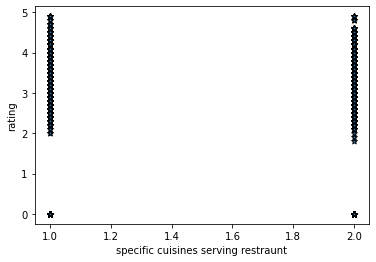

In [117]:
plt.scatter(sp,spr,marker='*',edgecolor='black')
plt.ylabel('rating')
plt.xlabel('specific cuisines serving restraunt')
plt.show()

# 2.2.1

In [145]:
x = df.groupby(by = 'Locality').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'Locality').apply(lambda x: (x['Votes'].sum()))
weighted_rating = x/y
round(weighted_rating, 3)

Locality
 ILD Trade Centre Mall, Sohna Road     2.817
12th Square Building, Banjara Hills    4.300
A Hotel, Gurdev Nagar                  3.600
ARSS Mall, Paschim Vihar               3.100
Aaya Nagar                             0.000
                                       ...  
Yusuf Sarai                            3.299
Z Square Mall, Mall Road               4.000
Zakir Nagar                            0.000
Zoo Tiniali                            4.219
ibis New Delhi, Aerocity               3.100
Length: 784, dtype: float64

In [146]:
sorted_weighted_rating = weighted_rating.sort_values(ascending = False)[0:10]

In [147]:
sorted_weighted_rating = weighted_rating.sort_values(ascending = False)[0:10]

print('top 10 localities with more weighted restaurant rating ->')
print()
print(round(sorted_weighted_rating, 2))

top 10 localities with more weighted restaurant rating ->

Locality
Aminabad                            4.90
Hotel Clarks Amer, Malviya Nagar    4.90
Friends Colony                      4.89
Powai                               4.84
Kirlampudi Layout                   4.82
Express Avenue Mall,  Royapettah    4.80
Deccan Gymkhana                     4.80
Banjara Hills                       4.72
Sector 5, Salt Lake                 4.71
Riverside Mall, Gomti Nagar         4.70
dtype: float64


# 3.1

In [5]:
res_name=[]
for i in df['Restaurant Name']:
    res_name.append(i)

In [7]:
y={}
for i in res_name:
    if i in y:
        y[i]+=1
    else:
        y[i]=1

In [13]:
a=y.keys()
b=y.values()

In [15]:
mydf = pd.DataFrame(list(zip(a,b)), columns = ['rest', 'No.of outlets'])

Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
McDonald's 48
Keventers 34
Pizza Hut 30
Giani 29
Baskin Robbins 28
Barbeque Nation 26


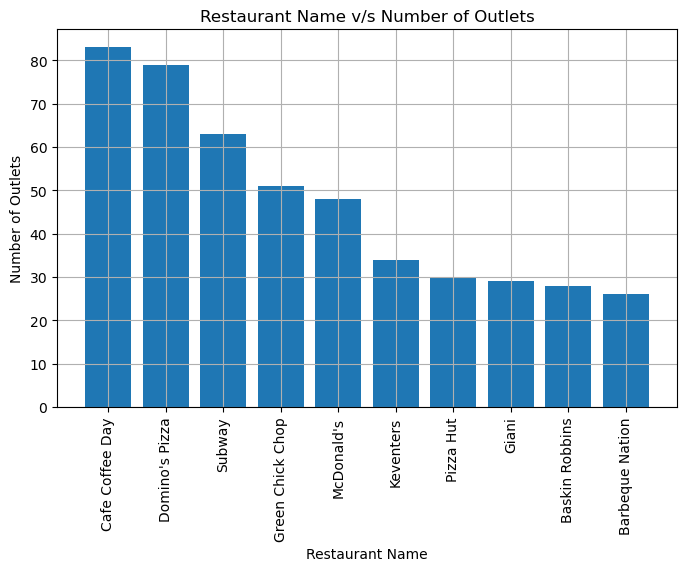

In [49]:
final_df = mydf.sort_values(by=['No.of outlets'], ascending=False)
final_df = final_df.reset_index()
del final_df['index']
c=final_df[0:10]
for i in c.index:
    print(c.rest[i],c['No.of outlets'][i])
x=[]
y=[]
for i in c.index:
    x.append(c.rest[i])
    y.append(c['No.of outlets'][i])
plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
plt.bar(x,y)
plt.grid()
plt.title('Restaurant Name v/s Number of Outlets')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Outlets')
plt.xticks(rotation = 90)
plt.show()

# 3.2

In [57]:
df = df[df['Country Code'] == 1]
df.reset_index(drop = True, inplace = True)
df.drop(df[df['Rating text'] == 'Not rated'].index , inplace = True)


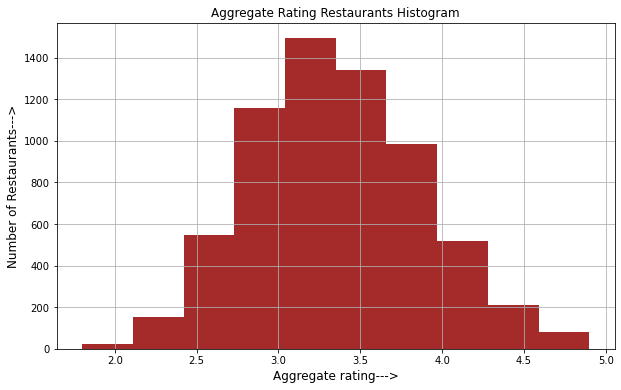

In [58]:
plt.figure(num=None, figsize=(10, 6),facecolor='w')
plt.hist(df['Aggr egate rating'] , facecolor='brown', align='mid')
plt.grid()
plt.title('Aggregate Rating Restaurants Histogram', size = 12)
plt.xlabel('Aggregate rating--->', size=12)
plt.ylabel('Number of Restaurants--->', size=12)
plt.show()

# 3.3

In [59]:
df = df[df['Country Code'] == 1]
df.reset_index(drop = True, inplace = True)

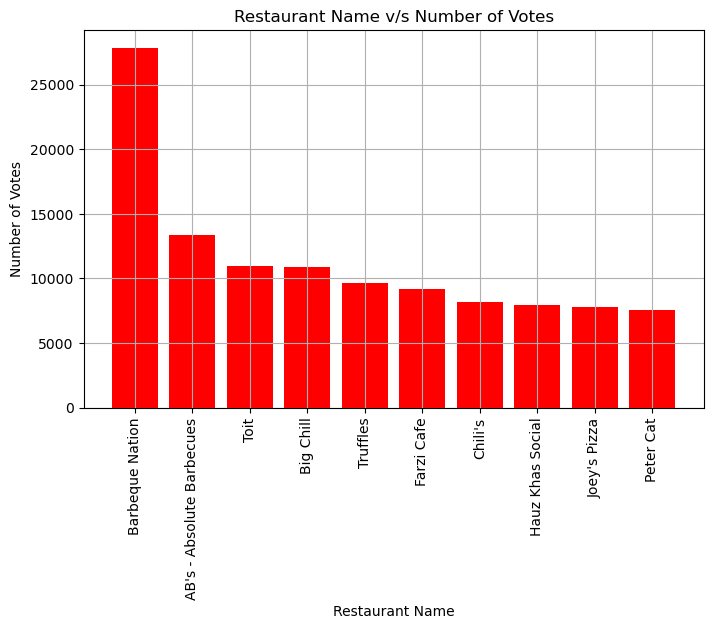

In [64]:
votes = df.groupby("Restaurant Name")["Votes"].sum().sort_values(ascending=False)[0:10]
x = votes.index
y = votes.values
plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
plt.bar(x,y, color = 'red')
plt.grid()
plt.title('Restaurant Name v/s Number of Votes')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Votes')
plt.xticks(rotation = 90)
plt.show()



# 3.4

In [73]:
df = df[df['Country Code'] == 216]  # considering only USA Restraunts 
df.reset_index(drop = True, inplace = True)
df['Cuisines'].fillna('Not known',inplace = True)
df['Cuisines'] = df['Cuisines'].str.split(', ')


American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


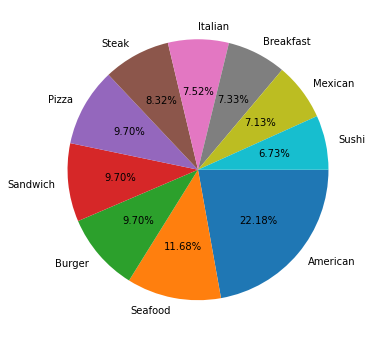

In [93]:
y={}
for i in df.Cuisines:
    for j in i:
        y[j]=y.get(j,0)+1
top_cuisines = sorted(y.items(), key = lambda kv:kv[1], reverse = True)[:10]
x = []
l = []
for i in top_cuisines:
    print(i[0],i[1])
    x.append(i[1])
    l.append(i[0])
plt.figure(num=None, figsize=(6, 6), facecolor='w', edgecolor='k')
plt.pie(x, labels = l, autopct='%.2f%%', counterclock=False)
plt.show()

# 3.5

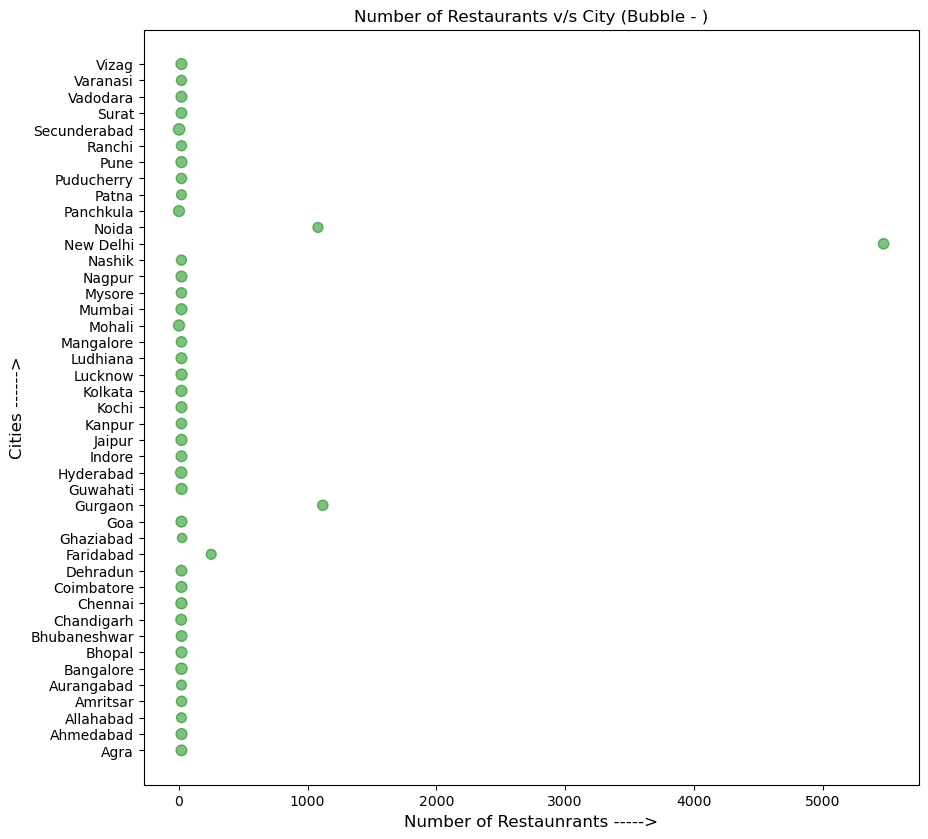

In [103]:
a = df.groupby(by = 'City').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
b = df.groupby(by = 'City').apply(lambda x: (x['Votes'].sum()))
restaurant_count = df.groupby(by = 'City').count()['Restaurant Name']
weighted_rating = a/b
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='green')
plt.scatter(restaurant_count.values, restaurant_count.index,s = weighted_rating*15, alpha = 0.5, c = 'green')
plt.title('Number of Restaurants v/s City (Bubble - )')
plt.xlabel('Number of Restaunrants ----->', size = 12)
plt.ylabel('Cities ------>', size = 12)
plt.show()